# Feature Engineering

Outcomes esperados:

 - Conhecer possíveis soluções para dados nulos para minimizar a perda de dados

 - Entender a necessidade de normalização ou estandardização de features em modelos lineares

 - Discutir as possíveis vantagens e melhorias de performance de modelos quando se transforma os dados

 - Aprender estratégias de encoding de variáveis categóricas, como one-hot-encoding, label encoding, binary encoding, count encoding, etc, discutindo vantagens e desvantagens de cada abordagem

 - Saber transformar features e criar novas features, derivadas das features originais

 - Entender abordagens para se lidar com features temporais e espaciais/geográficas

> “Coming up with features is difficult, time-consuming, requires expert knowledge. ‘Applied machine learning’ is basically feature engineering.”
— Prof. Andrew Ng.

![](https://media.giphy.com/media/3ZALZoBtI1KJa/giphy.gif)

## Quais decisões que tomamos na aula retrasada e poderiam ser melhoradas?

 - Faz sentido utilizar só os atributos númericos?
 - Faz sentido usar os atributos númericos do jeito que eles vieram?
 - Faz sentido substituir os nulos TODOS por zero?
 - O que fazer com os atributos geográficos?
 - É possível melhorar os atributos que já existem?

## Vamos fazer uma nova tentativa com mais carinho com os dados

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin

%matplotlib inline

In [2]:
from confusion_matrix import plot_confusion_matrix

In [3]:
# carregue o dataset novamente

In [4]:
df = pd.read_csv('lending-club-loan-data/small_loan.csv', low_memory=False)

In [5]:
df = df[(df.loan_status != 'Current')]
df['good_loan'] = df.loan_status == 'Fully Paid'

Sabemos que a distribuição dos dados numéricos não está normalizada. Vamos usar o standard scale para corrigir isso

In [6]:
initial_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'good_loan']

In [7]:
numeric_df = df[initial_vars]

In [8]:
#antes de normalizar as variáveis precisamos substituir os nulos

In [9]:
numeric_df.isnull().mean().sort_values(ascending=False).head(50)

mths_since_last_record    0.816592
mths_since_last_delinq    0.506940
dti                       0.001375
revol_util                0.001019
good_loan                 0.000000
total_acc                 0.000000
revol_bal                 0.000000
pub_rec                   0.000000
open_acc                  0.000000
inq_last_6mths            0.000000
delinq_2yrs               0.000000
annual_inc                0.000000
installment               0.000000
int_rate                  0.000000
loan_amnt                 0.000000
dtype: float64

In [10]:
#verifique a média e mediana desses atributos. Elas estão muito distantes? Qual o desvio padrão de cada atributo?
# com essa informação em mãos, escolha usar a média ou a mediana para substituir os valores nulos.

In [11]:
numeric_df = numeric_df.fillna(numeric_df.mean())

In [12]:
# outra possibilidade inteligente seria substituir os valores médios pelas suas respectivas regiões.

In [13]:
#complete_df["mths_since_last_record"] = complete_df.groupby("addr_state")["mths_since_last_record"].transform(lambda x: 
#                                                                                                          x.fillna(x.mean()))

In [14]:
# vamos separar o conjunto de treino e teste antes de preparar os dados

In [15]:
X_train, X_test, y_train, y_test = train_test_split(numeric_df.drop('good_loan',axis=1),
                                                    numeric_df['good_loan'],test_size=0.3,random_state=42)

In [16]:
# agora podemos usar o Standard Scaler

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

In [18]:
# agora que nos usamos o z-score, será que a nossa predição ficou melhor?

In [19]:
balanced_clf = LogisticRegression(random_state=42, class_weight='balanced').fit(X_scaled, y_train)

In [20]:
X_test_scaled = scaler.transform(X_test)

In [21]:
y_pred = balanced_clf.predict(X_test_scaled)

Normalized confusion matrix
[[ 0.61578241  0.38421759]
 [ 0.34690951  0.65309049]]


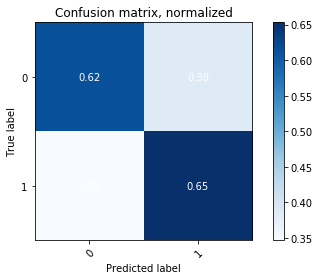

In [22]:
plot_confusion_matrix(y_test, y_pred, normalize=True,
                      title='Confusion matrix, normalized')

In [23]:
# e se eu mudasse o pipeline e usasse o RobustScaler?

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
transformer = RobustScaler().fit(X_train)
X_train_transformed = transformer.transform(X_train)

In [26]:
balanced_clf.fit(X_train_transformed, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [27]:
X_test_scaled = scaler.transform(X_test)

In [28]:
y_pred = balanced_clf.predict(X_test_scaled)

Normalized confusion matrix
[[ 0.54969917  0.45030083]
 [ 0.29870316  0.70129684]]


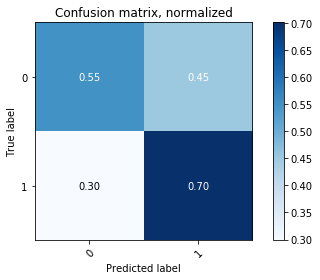

In [29]:
plot_confusion_matrix(y_test, y_pred, normalize=True,
                      title='Confusion matrix, normalized')

## E as variáveis categóricas?

Podemos adicionar as variáveis da forma como estão?

In [30]:
# vamos voltar a usar o dataset original

In [31]:
complete_df = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'good_loan']

In [32]:
# adicionar variáveis categoricas

In [33]:
cat_df = df[complete_df]

In [34]:
cat_df.isnull().mean().sort_values(ascending=False)

mths_since_last_record    0.816592
mths_since_last_delinq    0.506940
dti                       0.001375
revol_util                0.001019
good_loan                 0.000000
pymnt_plan                0.000000
term                      0.000000
int_rate                  0.000000
installment               0.000000
grade                     0.000000
home_ownership            0.000000
annual_inc                0.000000
verification_status       0.000000
addr_state                0.000000
purpose                   0.000000
total_acc                 0.000000
delinq_2yrs               0.000000
inq_last_6mths            0.000000
open_acc                  0.000000
pub_rec                   0.000000
revol_bal                 0.000000
loan_amnt                 0.000000
dtype: float64

In [35]:
cat_df = cat_df.fillna(numeric_df.mean())

In [36]:
# temos que dividir o conjunto em treino e teste novamente

In [37]:
X_train, X_test, y_train, y_test = train_test_split(cat_df.drop('good_loan',axis=1),
                                                    cat_df['good_loan'],test_size=0.3,random_state=42)

In [38]:
# verificar os diferentes tipos de atributos categoricos

In [39]:
x_train = X_train.copy()

### One Hot Enconding

 - Usado com a maioria dos algoritmos lineares
 - Excluir a primeira coluna evita colinearidade
 - Não introduz ordem ao atributo
 - Aumenta a dimensionalidade do dataset

In [40]:
cat_df.addr_state.value_counts().head()

CA    33150
TX    19181
NY    18198
FL    17263
IL     7964
Name: addr_state, dtype: int64

In [41]:
state_dummies = pd.get_dummies(x_train.addr_state, drop_first=True)

Enquanto trabalhamos modificando datasets é importante fazer validações das transformações que realizamos nele. Vamos construindo verificações do tamanho da dataset conforme formos fazendo visualizações.

In [42]:
x_train.shape

(160817, 21)

In [43]:
# coloque os dummies no dataset de treino e remova a coluna original

In [44]:
x_train = pd.concat([x_train, state_dummies], axis=1)

# validação
x_train.shape

(160817, 70)

In [45]:
x_train.drop('addr_state',axis=1, inplace=True)

In [46]:
x_train.shape

(160817, 69)

In [47]:
# Agora é necessário fazer isso para as variáveis verification_status e pymnt_plan

In [48]:
# Poderiamos construir uma classe que faz isso para todas as variáveis

In [49]:
cat_df.verification_status.value_counts()

Source Verified    91519
Not Verified       77442
Verified           60778
Name: verification_status, dtype: int64

In [50]:
verification_dummies = pd.get_dummies(x_train.verification_status, prefix="verification_status-", drop_first=True)

In [51]:
x_train = pd.concat([x_train, verification_dummies], axis=1)
# validação
x_train.shape

(160817, 71)

In [52]:
x_train.drop('verification_status',axis=1, inplace=True)
x_train.shape

(160817, 70)

In [53]:
cat_df.pymnt_plan.value_counts()

n    229284
y       455
Name: pymnt_plan, dtype: int64

In [54]:
pymnt_plan_dummies = pd.get_dummies(x_train.pymnt_plan, prefix="pymnt_plan-",  drop_first=True)

In [55]:
X_train = pd.concat([x_train, pymnt_plan_dummies], axis=1)
# validação
X_train.shape

(160817, 71)

E se eu quisesse escrever uma função que faria isso de maneira mais organizada?
Vamos utilizar uma classe e colocar todo o nosso processamento de OHE lá

In [56]:
class CategoricalToDummyFeaturesTransform(BaseEstimator, TransformerMixin):
    """ Classe de Feature Transformer que transforma labels na representação Dummy.
        Esse imputer mantém a entrada X como um DataFrame em vez de transformar em numpy.array.
    """
        
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X):        
        X_t = X.drop(['pymnt_plan', 'verification_status', 'addr_state'], axis=1)
        
        pymnt_plan_dummies = pd.get_dummies(X.pymnt_plan, prefix="pymnt_plan",  drop_first=True)
        verification_dummies = pd.get_dummies(X.verification_status, 
                                              prefix="verification_status", drop_first=True)
        state_dummies = pd.get_dummies(X.addr_state, drop_first=True)
        
        
        X_t = pd.concat([X_t, pymnt_plan_dummies, verification_dummies, state_dummies], axis=1)
        
        return X_t


In [57]:
X = CategoricalToDummyFeaturesTransform().transform(X_train)

ValueError: labels ['verification_status' 'addr_state'] not contained in axis

In [ ]:
X.columns

In [ ]:
X.shape

### Label Enconder

 - Give every categorical variable a unique numerical ID
 - Useful for non-linear tree-based algorithms
 - Does not increase dimensionality
 - Traz ordem aos atributos 

Vamos usar Label Enconder no atributo _grade_

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
grade_enconded = le.transform(X_train.grade)

In [ ]:
list(le.inverse_transform([0, 1, 2]))

In [ ]:
cat_df.grade.value_counts()

### LabelCount encoding

 - Rank categorical variables by count in train set
 - Not sensitive to outliers
 - Won’t give same encoding to different variables
 - Useful for both linear and non-linear algorithms

In [ ]:
label_count = dict(cat_df.home_ownership.value_counts())
label_count

In [ ]:
cat_df = cat_df.replace({"home_ownership": label_count})

In [ ]:
cat_df.home_ownership.value_counts()

### Target encoding

 - Encode categorical variables by their ratio of target (binary classification or regression)
 - Be careful to avoid overfit!

In [ ]:
target_prop = dict(cat_df.purpose.value_counts(normalize=True))
target_prop

In [ ]:
target_prop

In [ ]:
cat_df = cat_df.replace({"purpose": target_prop})

In [ ]:
cat_df.purpose.value_counts()

In [ ]:
# one hot enconding

In [ ]:
# existem formas melhores de fazer o pre processamento de dados de localização?
# - https://medium.com/creditas-tech/incrementando-dados-geogr%C3%A1ficos-com-o-censo-nacional-do-ibge-54d342c4bdcf

In [ ]:
# quando vale mais a pena usar um ou outro?

In [ ]:
# depois da adição das variáveis categóricas como ficou o nosso dataset?

In [ ]:
# verificar criação de novas features

Criar a variavel _region_ com as regioes dos Estados dos Estados Unidos

In [ ]:
df['addr_state'].unique()

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

In [ ]:
df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

Outra possibilidade é utilizar uma coluna que é categorica e transformá-la em um número

In [ ]:
# Podemos fazer isso com a coluna emp_length

In [ ]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0
 

O reverso também pode ser feito, criar variáveis categóricas a partir de númericas

In [ ]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'

Para mais detalhes sobre outros métodos de Feature Engineering veja [esses slides](https://www.dropbox.com/s/mebc9i6kxgm516c/feature-engineering-mlmeetup.pdf?dl=0) do HJ van Veen

In [ ]:
# Adicionar como exercício a construção de um pipeline